In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import re

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train['set'] = 'train'
df_test['set'] = 'test'
df_test['SalePrice'] = np.nan
df_all = pd.concat([df_train,df_test], sort = True)

In [5]:
total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471


In [6]:
for c in ['MiscFeature', 'Alley', 'Fence']:
    df_all[c].fillna('none', inplace = True)

In [7]:
numerical_feats = df_all.dtypes[df_all.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

Number of Numerical features:  38


In [8]:
categorical_feats = df_all.dtypes[df_all.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Categorical features:  44


In [9]:
print(df_all.shape)

(2919, 82)


In [10]:
categorical_data = df_all.select_dtypes(include = object)
for column in categorical_data.columns:
    print(column ,': ',df_all[column].unique())

Alley :  ['none' 'Grvl' 'Pave']
BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
BsmtCond :  ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure :  ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 :  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 :  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual :  ['Gd' 'TA' 'Ex' nan 'Fa']
CentralAir :  ['Y' 'N']
Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Electrical :  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
ExterCond :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
ExterQual :  ['Gd' 'TA' 'Ex' 'Fa']
Exterior1st :  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]
Exterior2nd :  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock' nan]
Fence :  ['none' '

In [11]:
for category in categorical_data.columns:
    print('#'*35)
    print('Distribuition of feature:', category)
    print(df_all[category].value_counts(normalize=True))
    print('#'*35)

###################################
Distribuition of feature: Alley
none    0.932169
Grvl    0.041110
Pave    0.026721
Name: Alley, dtype: float64
###################################
###################################
Distribuition of feature: BldgType
1Fam      0.830764
TwnhsE    0.077766
Duplex    0.037342
Twnhs     0.032888
2fmCon    0.021240
Name: BldgType, dtype: float64
###################################
###################################
Distribuition of feature: BsmtCond
TA    0.918576
Gd    0.043003
Fa    0.036658
Po    0.001762
Name: BsmtCond, dtype: float64
###################################
###################################
Distribuition of feature: BsmtExposure
No    0.671131
Av    0.147339
Gd    0.097286
Mn    0.084244
Name: BsmtExposure, dtype: float64
###################################
###################################
Distribuition of feature: BsmtFinType1
Unf    0.299648
GLQ    0.298944
ALQ    0.151056
Rec    0.101408
BLQ    0.094718
LwQ    0.054225
Name: Bsm

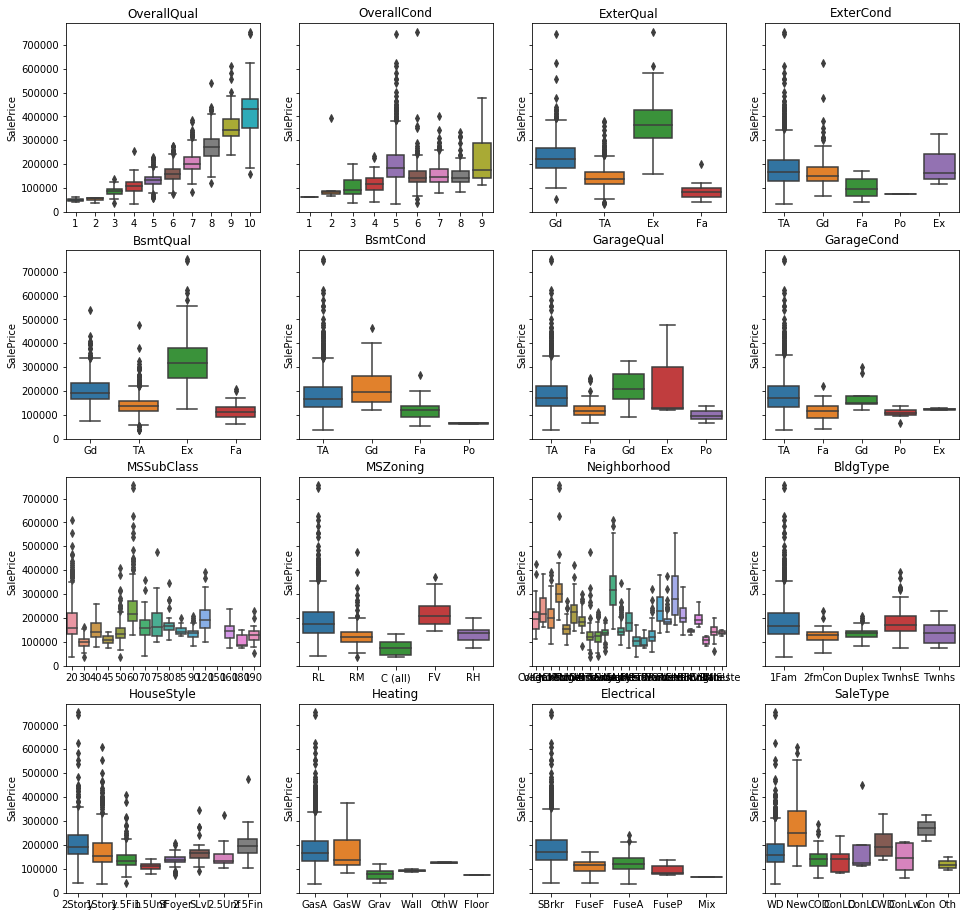

In [12]:
fig, axes = plt.subplots(4,4, figsize=(4*4,4*4),sharey=True)
axes = np.ravel(axes)

cols = ['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
        'BsmtCond','GarageQual','GarageCond', 'MSSubClass','MSZoning',
        'Neighborhood','BldgType','HouseStyle','Heating','Electrical','SaleType']

for i, c in zip(np.arange(len(axes)), cols):
    ax = sns.boxplot(x=c, y='SalePrice', data=df_all, ax=axes[i])
    ax.set_title(c)
    ax.set_xlabel("")

In [13]:
cols = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr",
        "KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd",
        "LowQualFinSF","GarageYrBlt"]
for c in cols:
    df_all[c] = df_all[c].astype(str)
    

In [14]:
df_all[['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 10 columns):
ExterQual      2919 non-null object
ExterCond      2919 non-null object
BsmtQual       2838 non-null object
BsmtCond       2837 non-null object
HeatingQC      2919 non-null object
KitchenQual    2918 non-null object
FireplaceQu    1499 non-null object
GarageQual     2760 non-null object
GarageCond     2760 non-null object
PoolQC         10 non-null object
dtypes: object(10)
memory usage: 330.9+ KB


In [15]:
cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
for c in cols:
    df_all[c].fillna(0, inplace=True)
    df_all[c].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [16]:
df_all[['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 10 columns):
ExterQual      2919 non-null int64
ExterCond      2919 non-null int64
BsmtQual       2919 non-null int64
BsmtCond       2919 non-null object
HeatingQC      2919 non-null int64
KitchenQual    2919 non-null int64
FireplaceQu    2919 non-null int64
GarageQual     2919 non-null int64
GarageCond     2919 non-null int64
PoolQC         2919 non-null int64
dtypes: int64(9), object(1)
memory usage: 330.9+ KB


In [17]:
def pair_features_to_dummies(df, col1, col2, prefix):
    d_1 = pd.get_dummies(df[col1].astype(str), prefix=prefix)
    d_2 = pd.get_dummies(df[col2].astype(str), prefix=prefix)
    for c in list(set(list(d_1.columns) + list(d_2.columns))):
        if not c in d_1.columns: d_1[c] = 0
        if not c in d_2.columns: d_2[c] = 0
    return (d_1 + d_2).clip(0, 1)

In [18]:
cond = pair_features_to_dummies(df_all,'Condition1','Condition2','Condition')
exterior = pair_features_to_dummies(df_all,'Exterior1st','Exterior2nd','Exterior')
bsmtftype = pair_features_to_dummies(df_all,'BsmtFinType1','BsmtFinType2','BsmtFinType')

In [19]:
all_data = pd.concat([df_all,cond,exterior,bsmtftype], axis = 1)
all_data.drop(['Condition1','Condition2', 'Exterior1st','Exterior2nd','BsmtFinType1','BsmtFinType2'], axis=1, inplace=True)

In [20]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Exterior_Wd Shng,Exterior_WdShing,Exterior_nan,BsmtFinType_ALQ,BsmtFinType_BLQ,BsmtFinType_GLQ,BsmtFinType_LwQ,BsmtFinType_Rec,BsmtFinType_Unf,BsmtFinType_nan
0,856,854,0,none,3,1Fam,3,No,706.0,0.0,...,0,0,0,0,0,1,0,0,1,0
1,1262,0,0,none,3,1Fam,3,Gd,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,920,866,0,none,3,1Fam,3,Mn,486.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,961,756,0,none,3,1Fam,4,No,216.0,0.0,...,1,0,0,1,0,0,0,0,1,0
4,1145,1053,0,none,4,1Fam,3,Av,655.0,0.0,...,0,0,0,0,0,1,0,0,1,0


In [21]:
# fillna
for c in ['MiscFeature', 'Alley', 'Fence']:
    all_data[c].fillna('None', inplace=True)
    
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

all_data.loc[all_data.GarageYrBlt.isnull(),'GarageYrBlt'] = all_data.loc[all_data.GarageYrBlt.isnull(),'YearBuilt']

all_data['GarageType'].fillna('None', inplace=True)
all_data['GarageFinish'].fillna(0, inplace=True)

for c in ['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    all_data[c].fillna(0, inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder


for i, t in all_data.loc[:, all_data.columns != 'SalePrice'].dtypes.iteritems():
    if t == object:
        all_data[i].fillna(all_data[i].mode()[0], inplace=True)
        all_data[i] = LabelEncoder().fit_transform(all_data[i].astype(str))
    else:
        all_data[i].fillna(all_data[i].median(), inplace=True)

In [23]:
all_data['OverallQualCond'] = all_data['OverallQual'] * all_data['OverallCond']
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['Interaction'] = all_data['TotalSF'] * all_data['OverallQual']

In [24]:
df_train = all_data[all_data['SalePrice'].notnull()]
df_test = all_data[all_data['SalePrice'].isnull()].drop('SalePrice', axis=1)

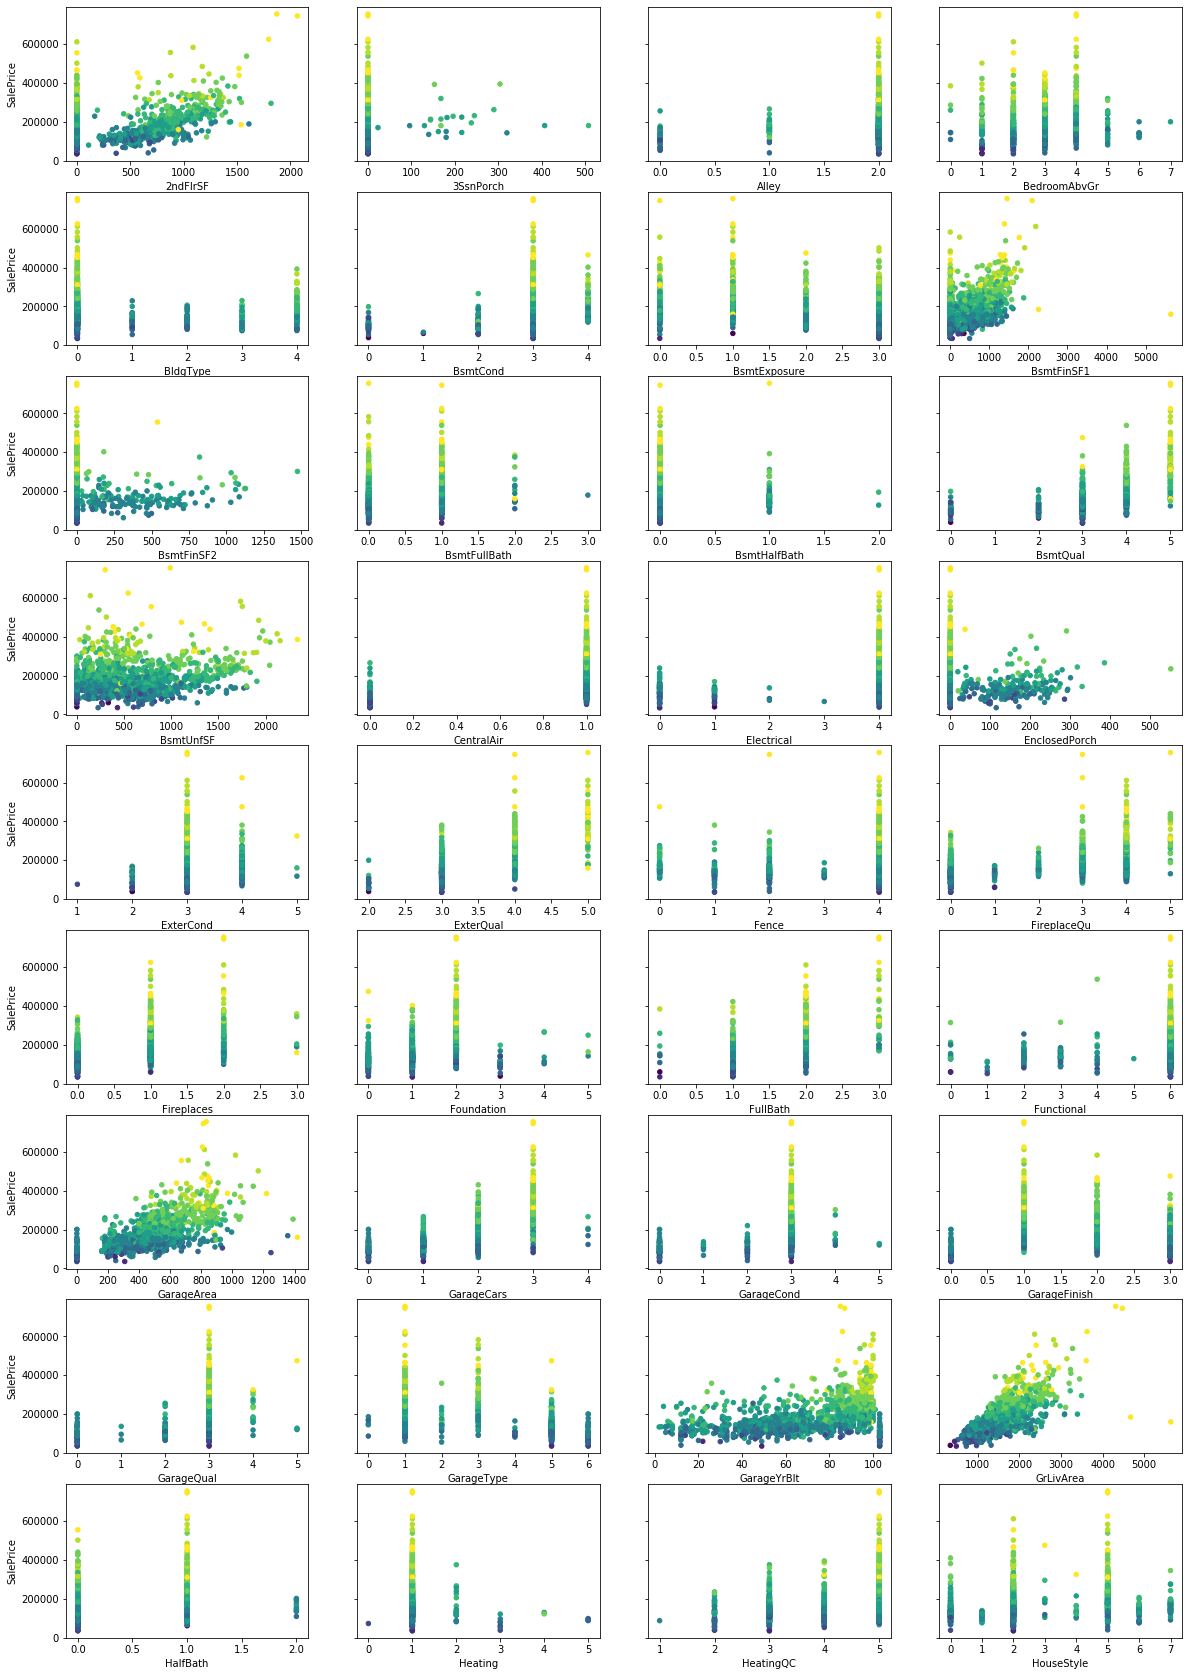

In [25]:
fig , axes = plt.subplots(nrows=9,ncols=4,figsize=(20,30))
axes = np.ravel(axes)
col_name = all_data.corr()['SalePrice'][1:].index
for i in range(36):
    all_data.plot.scatter(ax=axes[i], x=col_name[i], 
                          y='SalePrice', c='OverallQual', sharey=True, colorbar=False, cmap='viridis')

In [26]:
df_train = df_train[df_train['TotalSF'] < 6000]
df_train = df_train[df_train['TotalBsmtSF'] < 4000]
df_train = df_train[df_train['SalePrice'] < 700000]

In [27]:
X_train = df_train.drop(['SalePrice','Id'], axis=1).values
y_train = df_train['SalePrice'].values
X_test  = df_test.drop(['Id'], axis=1).values

print(X_train.shape, y_train.shape, X_test.shape)

(1455, 113) (1455,) (1459, 113)


In [30]:
#importing necessary libraries

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error #To evaluate our model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.metrics import mean_squared_error as MSE

In [31]:
thresh = 5 * 10**(-4)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
select_X_val = selection.transform(X_test)
# test 
select_X_test = selection.transform(X_test)

In [34]:
select_X_train.shape

(1455, 40)

In [37]:
#create pipelines

pipelines = []
seed = 5

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Ridge", Ridge(random_state=seed, alpha= 0.1, tol=0.1, solver='auto' ))]
                 )))

pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Lasso", Lasso(random_state=seed, tol=0.1))]
                 )))

pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Lasso", ElasticNet(random_state=seed, tol=0.1))]
                 )))

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))]
                 )))

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))]
                 )))

pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))]
                 ))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())]
                 ))) 

pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())]
                 ))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())]
                 ))) 

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e3, degree=2))]
                 )))

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())]
                 )))
pipelines.append(
                ("Scaled_ADA-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ADA-reg", AdaBoostRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())]
                 )))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("RFA", RandomForestRegressor())]
                 )))



In [38]:
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, select_X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

Scaled_Ridge: 0.897728 (+/- 0.013119)
Scaled_Lasso: 0.856644 (+/- 0.023650)
Scaled_Elastic: 0.868340 (+/- 0.026030)


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

Scaled_RF_reg: 0.882518 (+/- 0.011196)


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

Scaled_ET_reg: 0.884981 (+/- 0.013755)
Scaled_BR_reg: 0.880407 (+/- 0.010255)
Scaled_Hub-Reg: 0.896788 (+/- 0.015289)
Scaled_BayRidge: 0.897543 (+/- 0.013681)
Scaled_DT_reg: 0.787311 (+/- 0.042260)
Scaled_SVR: 0.879696 (+/- 0.020715)
Scaled_KNN_reg: 0.862605 (+/- 0.017859)
Scaled_ADA-Reg: 0.852448 (+/- 0.016298)
Scaled_Gboost-Reg: 0.907635 (+/- 0.010117)


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

Scaled_RFR_PCA: 0.879237 (+/- 0.012585)


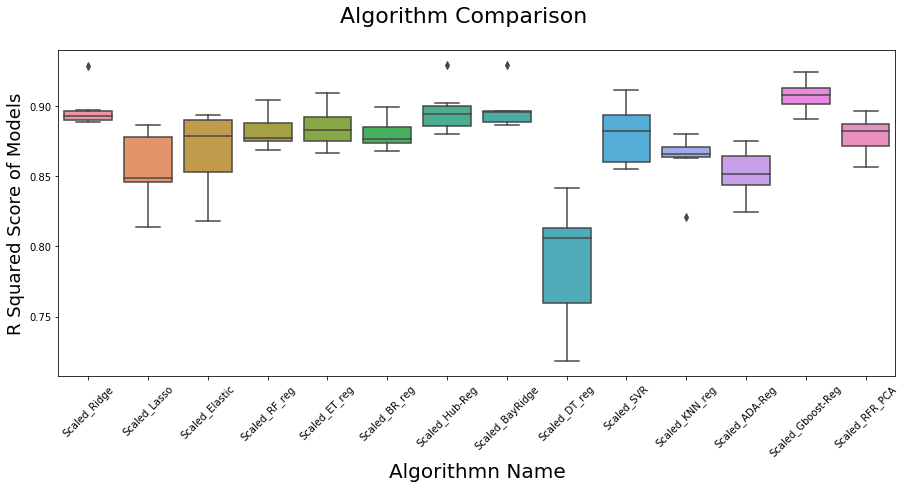

In [39]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()